In [1]:
data = pd.read_csv("Earnings Manipulation 220.csv")
data.head()

<IPython.core.display.Javascript object>

,Company Name,Year Ending,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,MANIPULATOR
0,1,3/31/2014,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,1
1,2,3/31/2009,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,1
2,3,3/31/2008,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,1
3,4,3/31/2014,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,1
4,5,3/31/2010,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,1


Cases of Manipulators vs. Non-Manipulators:

In [2]:
data.drop(columns = 'Year Ending', inplace = True)

MANIPULATOR
0    181
1     39
Name: count, dtype: int64


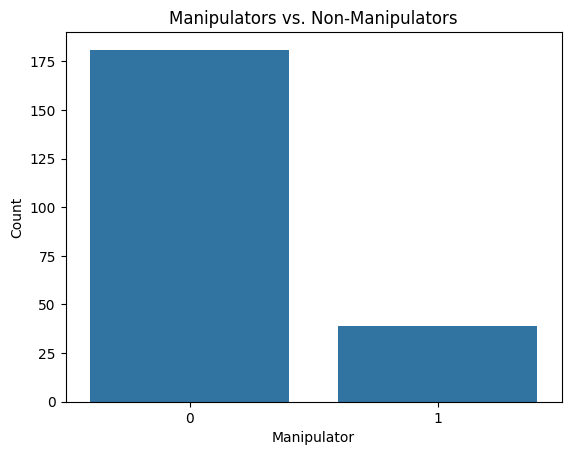

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

manipulators_count = data['MANIPULATOR'].value_counts()
print(manipulators_count)
sns.barplot(x=manipulators_count.index, y=manipulators_count.values)
plt.title('Manipulators vs. Non-Manipulators')
plt.xlabel('Manipulator')
plt.ylabel('Count')
plt.show()

Finding Positives in Test Data:

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop('MANIPULATOR', axis=1)
y = data['MANIPULATOR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
positives_in_test = y_test.sum()
print("Positives in test data:", positives_in_test)

Positives in test data: 6


Upsampling Technique:

In [5]:
from sklearn.utils import resample

non_manipulators = data[data['MANIPULATOR'] == 0]
manipulators = data[data['MANIPULATOR'] == 1]

manipulators_upsampled = resample(manipulators, replace=True, n_samples=len(non_manipulators), random_state=42)

balanced_data_upsampled = pd.concat([non_manipulators, manipulators_upsampled])
balanced_data_upsampled.shape

(362, 10)

Building Models:

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import warnings 
warnings.filterwarnings('ignore')

# Split data into train and test sets
X = balanced_data_upsampled.drop('MANIPULATOR', axis=1)
y = balanced_data_upsampled['MANIPULATOR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Naïve Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'Gradientboost': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

param_grids = {
    'Naïve Bayes': {},  # No hyperparameters for GaussianNB
    'KNN': {'n_neighbors': [5, 10, 15]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
    'Logistic Regression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'Adaboost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]},
    'Gradientboost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    'XGBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\n")


Naïve Bayes:
Accuracy: 0.7397260273972602
Precision: 0.9375
Recall: 0.45454545454545453
F1-score: 0.6122448979591837


KNN:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


SVM:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Logistic Regression:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Adaboost:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Gradientboost:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


XGBoost:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0




Downsampling Technique:

In [7]:
non_manipulators_downsampled = resample(non_manipulators, replace=False, n_samples=len(manipulators), random_state=42)

balanced_data_downsampled = pd.concat([non_manipulators_downsampled, manipulators])
balanced_data_downsampled.shape

(78, 10)

In [8]:
# Split data into train and test sets
X = balanced_data_downsampled.drop('MANIPULATOR', axis=1)
y = balanced_data_downsampled['MANIPULATOR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Naïve Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'Gradientboost': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

param_grids = {
    'Naïve Bayes': {},  # No hyperparameters for GaussianNB
    'KNN': {'n_neighbors': [5, 10, 15]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
    'Logistic Regression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'Adaboost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]},
    'Gradientboost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    'XGBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\n")


Naïve Bayes:
Accuracy: 0.75
Precision: 1.0
Recall: 0.42857142857142855
F1-score: 0.6


KNN:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


SVM:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Logistic Regression:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Adaboost:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Gradientboost:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


XGBoost:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


